Shape of original DataFrame:  (373400, 50)

Duplicate Rows Found: 134040
Shape after removing duplicate rows:  (239360, 46)


C:\Users\PC\AppData\Local\Temp\ipykernel_16340\860716732.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=label, palette='Set2')
C:\Users\PC\AppData\Local\Temp\ipykernel_16340\860716732.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=label, palette='Set2')
C:\Users\PC\AppData\Local\Temp\ipykernel_16340\860716732.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=label, palette='Set2')
C:\Users\PC\AppData\Local\Temp\ipykernel_16340\860716732.py:35: FutureWarning: 

Passing `palette` without as

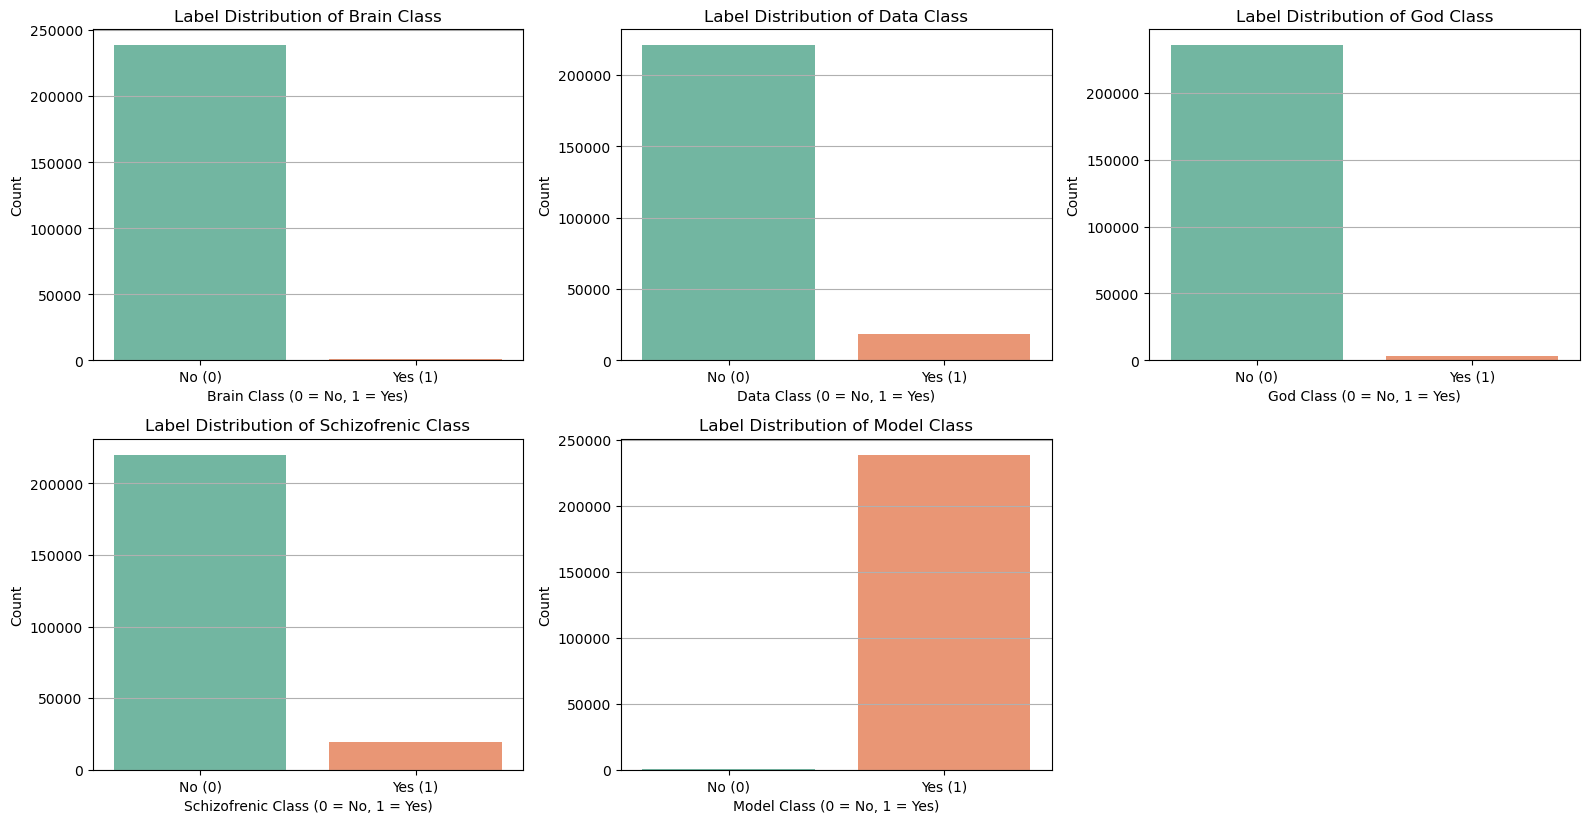

Value counts for Brain Class:
 Brain Class
False    238526
True        834
Name: count, dtype: int64 

Value counts for Data Class:
 Data Class
False    220974
True      18386
Name: count, dtype: int64 

Value counts for God Class:
 God Class
False    235824
True       3536
Name: count, dtype: int64 

Value counts for Schizofrenic Class:
 Schizofrenic Class
False    220037
True      19323
Name: count, dtype: int64 

Value counts for Model Class:
 Model Class
True     238985
False       375
Name: count, dtype: int64 

Shape of the data frame:  (239360, 46)
Processing label: Brain Class


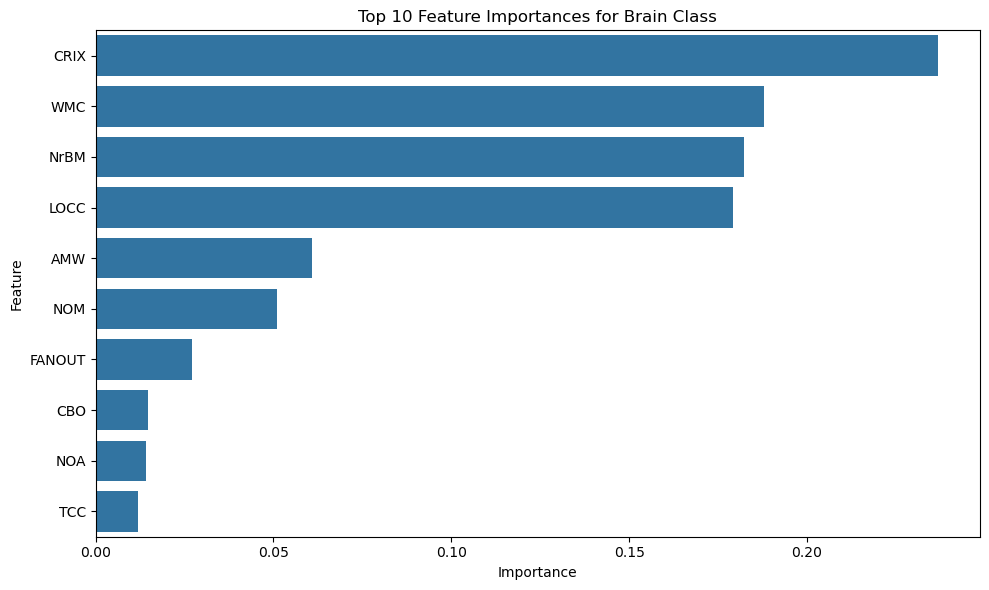

Processing label: Data Class


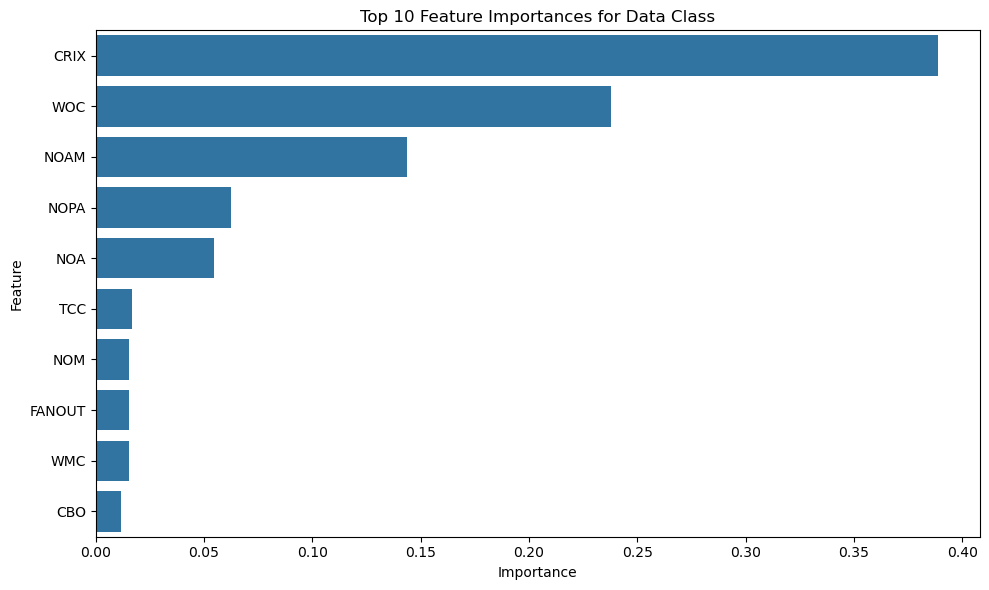

Processing label: God Class


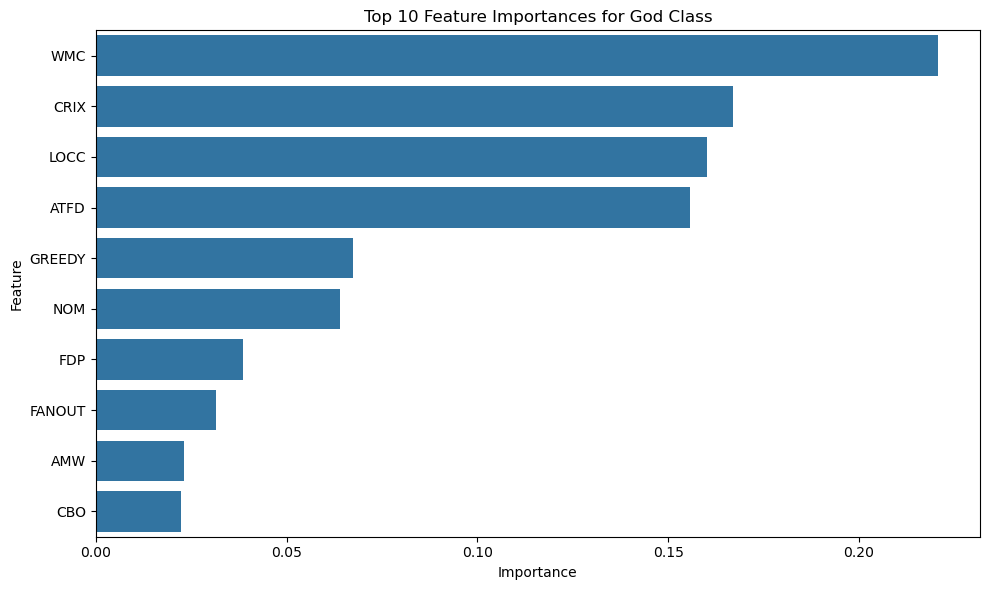

Processing label: Schizofrenic Class


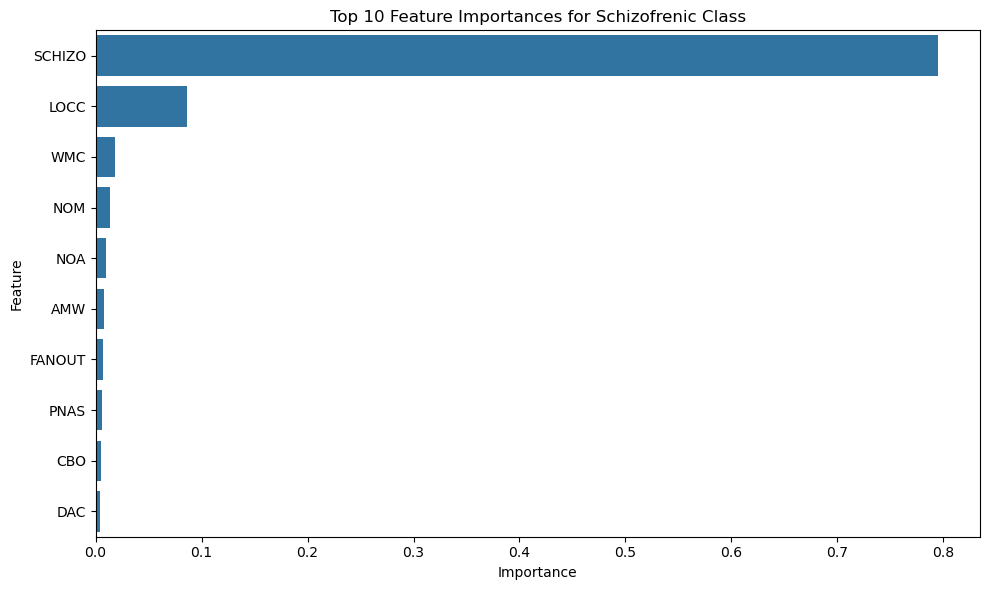

Processing label: Model Class


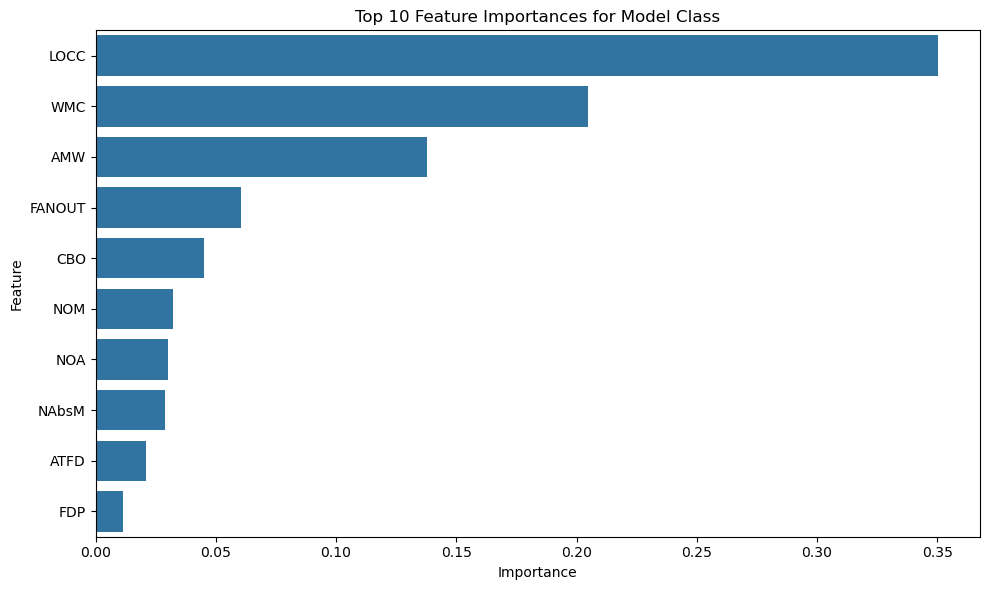

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# **Load Dataset**
df = pd.read_csv('Data/New-Class-smell.csv')
print("Shape of original DataFrame: ", df.shape)
df = df.drop(columns=['Address','Hierarchy Duplication','Futile Abstract Pipeline','Futile Hierarchy'])
# **Define Code Smell Columns**
smell_columns = [
    'Brain Class', 'Data Class', 
    'God Class', 'Schizofrenic Class', 'Model Class'
]

# Retain only features and code smell columns

# **Check for Duplicate Rows**
duplicates = df[df.duplicated()]
print(f"\nDuplicate Rows Found: {duplicates.shape[0]}")
df = df.drop_duplicates()
print("Shape after removing duplicate rows: ", df.shape)

# **Visualize Label Distribution for Each Code Smell**
plt.figure(figsize=(16, 12))  # Adjusted size for better visualization

# Iterate through each smell column
for i, label in enumerate(smell_columns, 1):
    plt.subplot(3, 3, i)  # Adjust grid for 8 labels (3 rows x 3 columns)
    sns.countplot(data=df, x=label, palette='Set2')
    plt.title(f'Label Distribution of {label}')
    plt.xlabel(f'{label} (0 = No, 1 = Yes)')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'])
    plt.grid(axis='y')

# Adjust layout for the subplots
plt.tight_layout()
plt.show()

# Display value counts for each label
for label in smell_columns:
    print(f"Value counts for {label}:\n", df[label].value_counts(), "\n")

print("Shape of the data frame: ", df.shape)

# **Feature Importance Analysis**

# Separate features and labels
X = df.drop(columns=smell_columns)  # Features
y = df[smell_columns]  # Labels

# Function to calculate and plot feature importance for each label
def feature_importance_random_forest(X, y, label_columns):
    # Store feature importances for each label
    feature_importances = {}

    for label in label_columns:
        print(f"Processing label: {label}")
        
        # Prepare data
        y_label = y[label]
        X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.2, random_state=42)
        
        # Train Random Forest Classifier
        model = RandomForestClassifier(class_weight="balanced", random_state=42)
        model.fit(X_train, y_train)
        
        # Store feature importances
        importances = model.feature_importances_
        feature_importances[label] = importances

        # Plot feature importances
        importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
        plt.title(f'Top 10 Feature Importances for {label}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
    
    return feature_importances

# Call the function to calculate and plot feature importance for each label
feature_importances = feature_importance_random_forest(X, y, smell_columns)


